# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# **Project 13**

**Descripción del proyecto**

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.
Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

**Objetivo:**

- Aprender a predecir la probabilidad de pérdida (Churn), del próximo mes, para cada cliente.

- Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.

- Analizar los factores que más impactan la pérdida.

- Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:

    -Identificar a los grupos objetivo;

    -Sugerir medidas para reducir la rotación;
    
    -Describir cualquier otro patrón que observes con respecto a la interacción con los clientes.



## **Step 1: Import libraries and read the data**

In [707]:
#!pip install pandas
#!pip install scipy
#!pip install matplotlib
#!pip install seaborn
#!pip install plotly
#!pip install nbformat
#!pip install --upgrade nbformat
#!pip install scikit-learn

In [708]:
# Importo todas las librerías que me serán de utilidad a lo largo del proyecto.

import pandas as pd
import numpy as np
import scipy.stats as stats
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [709]:
# leer los datos
data = pd.read_csv('datasets/gym_churn_us.csv')

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Buena organización en la importación de librerías. Has cubierto una variedad de herramientas esenciales para análisis de datos, visualización y modelado. Mantener esta estructura clara facilitará el flujo del proyecto.  
</div>

## **Step 2: Exploratory Data Analysis (EDA)**

### **Familiarización con los datos**

In [710]:
data.sample(10, random_state=0)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2230,0,1,1,1,1,12,1,29,260.507459,12.0,2,2.348167,2.323455,0
668,0,0,0,0,1,1,1,27,48.087954,1.0,0,1.003281,0.728397,1
3616,0,0,1,0,1,6,0,30,24.620589,5.0,2,0.000000,0.000000,0
2363,1,1,0,0,1,1,1,27,139.893107,1.0,0,2.322132,1.838436,1
142,1,0,1,0,0,12,0,29,89.657794,12.0,1,3.521502,3.368137,0
538,1,1,1,0,1,12,1,26,169.933317,12.0,4,1.118238,1.141879,0
1791,1,0,0,0,1,1,0,34,224.208611,1.0,2,3.317759,3.386540,0
410,0,1,0,0,1,12,0,35,204.911058,12.0,2,2.708949,2.715933,0
1150,0,1,0,0,1,1,0,27,93.006365,1.0,1,1.777851,2.347247,1
1032,1,1,0,1,1,1,0,32,161.676880,1.0,5,1.917288,1.979258,0


In [711]:
# Reviso los tipos de las columnas y los cambio como convengan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

### **Duplicados y valores perdidos**

In [712]:
#Busco duplicados y valores perdidos en el df data

def duplicates_and_nulls(df):
    if df.duplicated().sum() == 0:
        print('No se encontraron filas duplicadas en este dataframe')
        
    else:
        print(f'hay {df.duplicated().sum()} valores duplicados')

    if df.isna().sum().sum() == 0:
        print('No se encontraron valores perdidos en este dataframe')
    else:
        print(f"Hay {df.isna().sum().sum()} valores perdidos en este dataframe")


duplicates_and_nulls(data)

No se encontraron filas duplicadas en este dataframe
No se encontraron valores perdidos en este dataframe


**Transformación de datos**

In [713]:
# Cambio la columna 'Month_to_end_contract' a enteros
data['Month_to_end_contract'] = data['Month_to_end_contract'].astype('Int64')

# Cambio los nombres de las columnas a minúsculas
data.columns = data.columns.str.lower()

### **Describe**

In [714]:
# Reviso los valores de las variables
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.32275,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.0,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.0,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.0,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.0,31.000000,6.023668,6.146783,1.000000


**Observaciones del método describe**

Utilizando este método, puedo observar algunas cosas en estos datos:
 - Aproximadamente la mitad de nuestros clientes son mujeres y la otra mitad son hombres, es decir tenemos una población bastante balanceada en términos de género. 
 - Casi el 85% de nuestros clientes vivien cerca de la sucursal, ese es un dato importante a tomar en consideración. 
 - Casi la mitad de nuestros clientes va con un acompañante (Partner). 
 - Respecto al teléfono 9 de cada 10 clientes lo otorga, difícilmente sea una variable que pueda darnos información sobre si cancelará o no. 
 - Tenemos clientes que pagan mes con mes y clientes que pagan de manera anual, probablemente los que pagan de manera anual no harán churn hasta que concluya el tiempo que ya pagaron.
 - La edad media de nuestros clientes (promedio) es de 29 años. 
 - La gran mayoría de nuestros clientes tienen cargos adicionales. 
 - tenemos una tasa aproximada del 26% de churn cada mes. 

**Valores medios: distribución**

In [715]:
# Agrupo los datos por churn, y muestro los valores medios de las personas que cancelaron y las que no.

users_by_churn = data.groupby('churn').mean().reset_index()
users_by_churn

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### **Cancelados y no cancelados (Churned and not churned)**

In [716]:
# Separo el df en los cancelados y los que no lo hicieron para conocer las características de cada grupo

churned_clients = data[data['churn'] == 1]
still_clients = data[data['churn'] == 0]

In [717]:
# Creo una lista con las características más relevantes para mostrar sus distribuciones:

hist_list = ['age', 'avg_additional_charges_total', 'avg_class_frequency_current_month',
             'contract_period', 'near_location', 'partner', 'promo_friends',
              'group_visits', 'month_to_end_contract', 'lifetime']

### **Clientes que Cancelaron (Churned)**

veamos cuantos clientes cancelaron en este periodo.

In [718]:
# Cantidad de clientes que hicieron churn
num_filas = churned_clients.shape[0]  

print(f" ----> {num_filas} clientes cancelaron en este periodo.")

 ----> 1061 clientes cancelaron en este periodo.


In [719]:
# Genero histrogramas de las variables más relevantes para conocer a los clientes que cancelaron.
for column in hist_list:
    fig = px.histogram(
    churned_clients, x=column, title=f'Distribución {column} de los clientes que cancelaron',
        labels={column: column},
        text_auto=True, color_discrete_sequence=['#ff7f0e'])
    fig.update_layout(
    yaxis_title='Frecuencia')
    fig.show()


**Insights**

- La mayoría de los clientes que hicieron Churn se encuentran entre los 25 y 30 años de edad.

- Es una tendencia que las personas que hacen Churn tienen un promedio bajo de compras adicionales.

- Los clientes que van menos de 2 veces por semana al Gimnasio es más probable que cancelen.

- La gran mayoría de los clientes que cancelaron, pagan su suscripción de manera mensual, los clientes que pagan semestral y anual son menos propensos a hacer Churn.

- Los clientes que tienen un ‘Partner’ tienen un menor índice de Churn.

- Los clientes con la promo_friends, cancelan menos que las personas sin la promoción.

- Los clientes que asisten a sesiones grupales, tienden a cancelar menos.

- Entre más meses tengan pagados los clientes, es menos probable que cancelen.




### **Clientes que no cancelaron**

In [720]:
# Genero histrogramas de las variables más relevantes para conocer a los clientes que no cancelaron.

for column in hist_list:
    fig = px.histogram(
    still_clients, x=column, title=f'Distribución {column} de los usuarios que siguen siendo clientes',
        labels={column: column},
        text_auto=True)
    fig.update_layout(
    yaxis_title='Frecuencia')
    fig.show()


**Insights**

- La mayoría de los clientes que continúan, tienen entre 27 y 33 años, son en general ligeramente mayores que los que cancelan.

- Existen muchos clientes que no compran servicios adicionales, sin embargo la mayoría de nuestros clientes sí lo hace con gastos que oscilan entre los 20 y los 250 dls.

- La mayoría de los clientes asiste al gimnasio dos o tres veces por semana.

- La mayoría de los clientes paga de manera mensual, sin embargo una importante parte de ellos también paga de manera semestral y anual.

- La gran mayoría de los clientes vive cerca del gimnasio

- Poco más de la mitad de nuestros usuarios tienen un Partner para entrenar.

- La cuarta parte de los clientes tiene la promoción friend.

- Aproximadamente la mitad de nuestros clientes asiste a los grupos de entrenamiento.

- La mayoría de los clientes tan solo lleva 3 meses o menos entrenando en nuestro gimnasio.



### **Correlación**

Genero una matriz de correlación para ver qué variables están vinculadas o dependen de otras.

In [721]:
# Matriz de correlación

matriz_correlacion = data.corr()

# Creo una gráfica de la matriz de correlación
fig = px.imshow(
    matriz_correlacion,  # La matriz de correlación
    text_auto=True,  # Mostrar los valores de correlación en las celdas
    color_continuous_scale='RdBu',  # Escala de colores (rojo-azul)
    title='La matriz de correlación no parece mostrar fuertes correlaciones entre las variables'  # Título de la gráfica
)

fig.update_layout(width=1800, height=1200, title_x=0.48)  # Ajustar el tamaño

fig.show()

Aparentemente no existen fuertes correlaciones entre las diferentes variables. Las variables que más parecen estar correlacionadas son Partner y Promo Friends, con un 45 % de correlación.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente análisis exploratorio de datos. Has estructurado bien el proceso de familiarización, identificación de valores faltantes y duplicados, transformación de datos y exploración visual. La interpretación de los insights demuestra una comprensión clara de las tendencias en los datos.
</div>

## **Step 3: Build a Machine Learning Model**

### **Filtrado de valores atípicos**

In [722]:
# Calculo los percentiles 95 de mis datos para encontrar anomalías.

print('En las variables numéricas, consideraremos anomalía todo lo que esté por encima del percentil 95:\n')
for variable in data.columns:
    print(f"En {variable}:", np.percentile(data[variable], [95]))


En las variables numéricas, consideraremos anomalía todo lo que esté por encima del percentil 95:

En gender: [1.]
En near_location: [1.]
En partner: [1.]
En promo_friends: [1.]
En phone: [1.]
En contract_period: [12.]
En group_visits: [1.]
En age: [34.]
En avg_additional_charges_total: [323.44087589]
En month_to_end_contract: [12.]
En lifetime: [11.]
En avg_class_frequency_total: [3.53564837]
En avg_class_frequency_current_month: [3.54906154]
En churn: [1.]


Considero que no vale la pena eliminar las anomalías en este caso, continuaré sin modificaciones al respecto. Sin embargo he decidido transformar la variable contract_period para que sea mejor aprovechada por el modelo de Machine Learning (ML). 
A pesar de ser una variable numéricas, voy a transformarlas a categórica, y luego obtendré dummies para que le puedan servir al modelo de ML.

### **Convertir variables categóricas a numéricas (Dummies)**

In [723]:
# Muestro los valores que hay en la variable
data['contract_period'].value_counts()

contract_period
1     2207
12     960
6      833
Name: count, dtype: int64

In [724]:
# convierto en categórica
data['contract_period'] = data['contract_period'].astype(str)


In [725]:
# Obtengo dummies

data = pd.get_dummies(data, dtype=int, drop_first=True)
data

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,contract_period_12,contract_period_6
0,1,1,1,1,0,1,29,14.227470,5,3,0.020398,0.000000,0,0,1
1,0,1,0,0,1,1,31,113.202938,12,7,1.922936,1.910244,0,1,0
2,0,1,1,0,1,0,28,129.448479,1,2,1.859098,1.736502,0,0,0
3,0,1,1,1,1,1,33,62.669863,12,2,3.205633,3.357215,0,1,0
4,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,0,33,2.406023,12,8,2.284497,2.349070,0,1,0
3996,0,1,0,0,1,1,29,68.883764,1,1,1.277168,0.292859,1,0,0
3997,1,1,1,1,1,0,28,78.250542,11,2,2.786146,2.831439,0,1,0
3998,0,1,1,1,1,0,32,61.912657,5,3,1.630108,1.596237,0,0,1


### **Características y variable objetivo**

Para este modelo de machine learning tomaré como variable objetivo la cancelación (Churn) y todas las demás variables que me entregaron serán las características con las cuales se formará la matriz que entrenará y validará al modelo. 

In [726]:
# Declaro la variable objetivo y características

y = data['churn']
X = data.drop(columns=['churn'])

**División de los datos para entrenamiento y validación**

In [727]:
# divido los datos en entrenamiento y prueba (en 80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Estandarización de los datos**

In [728]:
# creo un objeto StandardScaler y lo aplícalo al conjunto de entrenamiento
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
  

In [729]:
# Utilizo la estandarización a la matriz de característica para el test de prueba
X_test_st = scaler.transform(X_test)

### **Elegir el mejor modelo de ML para el caso**

In [730]:
# Genero una lista de modelos que quiero poner a preuba.
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]

In [731]:
# Defino la función que toma un modelo y los datos como métricas input y output
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Exactitud:{:.2f} Presición:{:.2f} Recall:{:.2f} F1:{:.2f} \n'.format(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), 
                                                                              recall_score(y_test, y_pred), f1_score(y_test, y_pred)))

# Creo una función que toma cada uno de los modelos de la lista y los datos como métricas input y output, para medir qué tan bien funcionan.
for i in models:
    print(i)
    make_prediction(m=i,X_train = X_train_st, y_train= y_train,
                    X_test=X_test_st, y_test = y_test)


LogisticRegression()
Exactitud:0.92 Presición:0.85 Recall:0.83 F1:0.84 

DecisionTreeClassifier()
Exactitud:0.90 Presición:0.78 Recall:0.80 F1:0.79 

RandomForestClassifier()
Exactitud:0.92 Presición:0.85 Recall:0.80 F1:0.83 



**LogisticRegression** resulta ser el claro ganador, teniendo las mejores métricas respecto de los otros dos modelos.



In [732]:
# Modelo elegido
model = LogisticRegression()

In [733]:
# Entrenar modelo
model.fit(X_train_st, y_train)

LogisticRegression()

In [734]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_st)

### **Usar el modelo**

El DataFrame consta de 4000 casos (filas), los cuales se dividieron en 80 / 20 para este modelo de machine learning, esto quiere decir que 3200 fueron utilizados como entrenamiento (80%) y 800 fueron utilizados como datos de prueba (20%).

A continuación muestro las predicciones que arroja el modelo sobre ese 20%, del cual desconoce el resultado real.

In [735]:
# Predecir la probabilidad
y_pred_proba = model.predict_proba(X_test_st)

In [736]:
# Ver probabilidades predichas para cada uno de los 800 casos del conjunto de prueba
print("Probabilidades predichas:\n", y_pred_proba.round(3))

Probabilidades predichas:
 [[0.998 0.002]
 [0.022 0.978]
 [0.56  0.44 ]
 ...
 [0.867 0.133]
 [1.    0.   ]
 [0.999 0.001]]


In [737]:
# Clientes que cancelarán en el próximo mes.

fig = px.histogram(
    y_pred, color=y_pred, text_auto=True, barmode='stack',
    title='De los 800 clientes, 192 probablemente cancelarán',
    labels={'value': 'Abandonan el gimnasio'}
)

fig.show()

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen trabajo en la construcción del modelo de Machine Learning. Has seguido un flujo lógico desde la selección de características hasta la validación del modelo, asegurando una correcta preparación de los datos. La comparación de modelos demuestra un enfoque estructurado para elegir la mejor opción. 
</div>

## **Step 4: User's clusters**

Ahora realizaré un modelo de ML no supervisado, armando clústeres con los datos de los usuarios.

**Función linkage()** 

Para crear una matriz de distancias basada en la matriz de características estandarizada.

In [738]:
# Estandarización de los datos antes de pasarlo al algoritmo

sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')

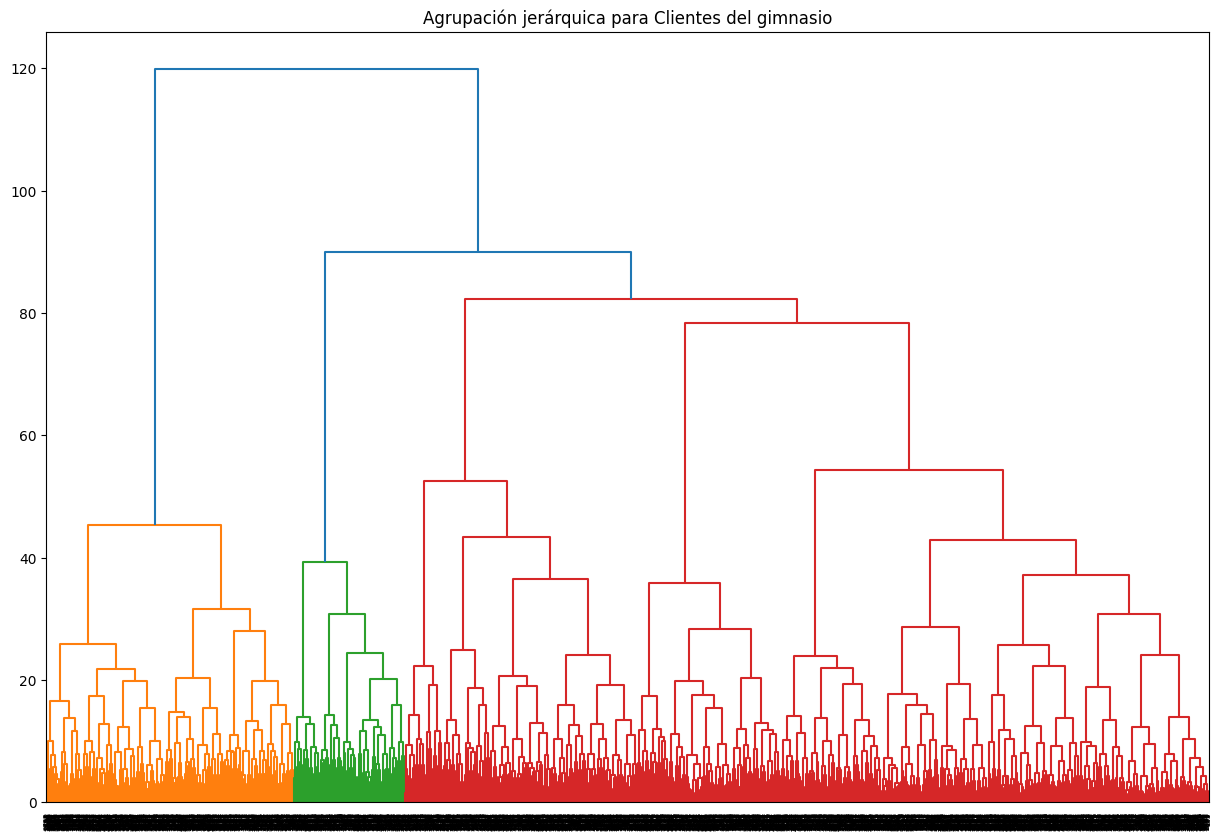

In [739]:
# Dendograma

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para Clientes del gimnasio')
plt.show()

El dendograma me muestra que hay al menos 3 grandes grupos (Clústeres) en el conjunto de datos de los clientes, sin embargo, veo que uno de esos grupos es demasiado grande, el clual se subdivide en otros 3, por lo tanto manejaré un umbral de k-means en 5 clústeres.

### **KMeans** 

In [740]:
# defino el modelo k_means con 5 clústeres
km = KMeans(n_clusters = 5)

In [741]:
# Genero etiquetas para los clústeres de las observaciones (el algoritmo les asigna un número de 0 a 4)
labels = km.fit_predict(X_sc)

In [742]:
# Coloco las etiquetas de clúster en el campo de nuestro conjunto de datos
data['cluster'] = labels

In [743]:
# Muestro el dataframe completo con sus 4000 casos, y observo que se ha creado la columna 'cluster'
data

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,contract_period_12,contract_period_6,cluster
0,1,1,1,1,0,1,29,14.227470,5,3,0.020398,0.000000,0,0,1,0
1,0,1,0,0,1,1,31,113.202938,12,7,1.922936,1.910244,0,1,0,2
2,0,1,1,0,1,0,28,129.448479,1,2,1.859098,1.736502,0,0,0,1
3,0,1,1,1,1,1,33,62.669863,12,2,3.205633,3.357215,0,1,0,2
4,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,0,33,2.406023,12,8,2.284497,2.349070,0,1,0,2
3996,0,1,0,0,1,1,29,68.883764,1,1,1.277168,0.292859,1,0,0,1
3997,1,1,1,1,1,0,28,78.250542,11,2,2.786146,2.831439,0,1,0,2
3998,0,1,1,1,1,0,32,61.912657,5,3,1.630108,1.596237,0,0,1,0


### **Estudiar los clústeres**

In [744]:
# Agrupo el df por los clústers

cluster_means = data.groupby('cluster').mean().reset_index()
cluster_means

,cluster,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,contract_period_12,contract_period_6
0,0,0.524129,0.953083,0.579088,0.414209,0.888740,0.469169,29.579088,151.810906,5.63807,4.245308,1.966269,1.916981,0.113941,0.000000,1.000000
1,1,0.475332,1.000000,0.333017,0.221063,0.909867,0.314991,27.975332,126.307540,1.019924,2.139469,1.254264,0.978077,0.608159,0.002846,0.001898
2,2,0.509033,0.941552,0.723698,0.486716,0.902232,0.549416,29.862912,164.514776,10.906482,4.671626,2.016800,2.009567,0.021254,1.000000,0.000000
3,3,0.555556,0.989160,0.334688,0.273713,0.902439,0.472900,30.157182,159.481126,1.054201,5.002710,2.672597,2.658960,0.096206,0.008130,0.006775
4,4,0.499040,0.000000,0.452975,0.061420,0.915547,0.193858,28.460653,132.227163,1.859885,2.666027,1.645032,1.447087,0.468330,0.019194,0.153551


#### **Género**

In [745]:
# Crear una columna que indique si es hombre o mujer
data['gender_label'] = data['gender'].map({0: 'Mujer', 1: 'Hombre'})

# Agrupar por clúster y género, y contar la cantidad de personas en cada grupo
grouped_data = data.groupby(['cluster', 'gender_label']).size().reset_index(name='count')


In [746]:
# Gráfica de barras sobre género de los clientes en los clústeres
fig = px.bar(
    grouped_data,x='cluster', y='count', color='gender_label', barmode='group',
             labels={'cluster': 'Clúster', 'count': 'Cantidad', 'gender_label': 'Género'},
             title='Cantidad de Hombres y Mujeres por Clúster')
fig.show()

La cantidad de hombres y mujeres por clúster es similar en la mayoría de los casos, sin embargo en el clúster 2 hay una ligera mayoría de hombres.

#### **Proximidad con su domicilio**

In [747]:
# Crear una columna que indique si near_location es 0 o 1
data['near_location_label'] = data['near_location'].map({0: 'No', 1: 'Sí'})

# Agrupar por clúster y near_location, y contar la cantidad de personas en cada grupo
grouped_data = data.groupby(['cluster', 'near_location_label']).size().reset_index(name='count')

# Crear la gráfica de barras
fig = px.bar(grouped_data, x='cluster', y='count', color='near_location_label', barmode='group',
             labels={'cluster': 'Clúster', 'count': 'Cantidad', 'near_location_label': 'Near Location'},
             title='Distribución de Personas que viven cerca por cada Clúster')
fig.show()

Casi todos los clientes viven cerca del gimnasio, sin embargo en el clúster 3 están agrupados sólo clientes que viven cerca, y en contraste en el cluster 4 sólo hay clientes que no viven cerca.

#### **Partner**

In [748]:
# Crear una columna que indique si near_location es 0 o 1
data['partner'] = data['partner'].map({0: 'No', 1: 'Sí'})

# Agrupar por clúster y near_location, y contar la cantidad de personas en cada grupo
grouped_data = data.groupby(['cluster', 'partner']).size().reset_index(name='count')


In [749]:
# Crear la gráfica de barras
fig = px.bar(grouped_data, x='cluster', y='count', color='partner', barmode='group',
             labels={'cluster': 'Clúster', 'count': 'Cantidad', 'partner': 'Compañero(a)'},
             title='Distribución de Personas que van acompañados por cada Clúster')

fig.show()

Los Clústers 0 y 1 están conformados mayormente por clientes que Sí tienen una compañera o compañero, por el contrario los clusters 2 y 3 son los clústers que más indican sí tener compañero(a), y por último el clúster 4 está equilibrado, la mitad tiene y la otra mitad no.

#### **Promo friends**

In [750]:
# Crear una columna que indique si near_location es 0 o 1
data['promo_friends_label'] = data['promo_friends'].map({0: 'No', 1: 'Sí'})

# Agrupar por clúster y near_location, y contar la cantidad de personas en cada grupo
grouped_data = data.groupby(['cluster', 'promo_friends_label']).size().reset_index(name='count')

# Crear la gráfica de barras
fig = px.bar(grouped_data, x='cluster', y='count', color='promo_friends_label', barmode='group',
             labels={'cluster': 'Clúster', 'count': 'Cantidad', 'near_location_label': 'Near Location'},
             title='Distribución de Personas que usan la promoción de amigos, por cada Clúster')
fig.show()

La mayoría de nuestros clientes no usa la promoción pero en los clústeres 0, 3 y 4, la mitad de los clientes que pertenece a esos grupos la tiene.

#### **Sesiones en grupales**

In [751]:
# Crear una columna que indique si group_visits es 0 o 1
data['group_visits_label'] = data['group_visits'].map({0: 'No', 1: 'Sí'})

# Agrupar por clúster y group_visits, y contar la cantidad de personas en cada grupo
grouped_data = data.groupby(['cluster', 'group_visits_label']).size().reset_index(name='count')

# Crear la gráfica de barras
fig = px.bar(grouped_data, x='cluster', y='count', color='group_visits_label', barmode='group',
             labels={'cluster': 'Clúster', 'count': 'Cantidad', 'group_visits_label': 'Group Visits'},
             title='Distribución de Personas que asisten a las sesiones grupales por Clúster')

# Mostrar la gráfica
fig.show()

La mayoría de nuestros clientes no asisten a las sesiones grupales, sin embargo el cluster 0 es el que cuenta con más clientes que asisten a estas sesiones.

#### **Edad**

In [752]:
# Crear el histograma superpuesto
fig = px.histogram(data, x='age', color='cluster', barmode='overlay',
                   labels={'age': 'Edad', 'cluster': 'Clúster'},
                   title='Distribución de Edades por Clúster')
fig.show()

La mayoría de nuestros clientes está entre los 25 y 35 años de edad, sin importar el clúster al que pertenezca.

#### **Cargos extra**

In [753]:
# Crear el histograma superpuesto
fig = px.histogram(data, x='avg_additional_charges_total', color='cluster', barmode='overlay',
                   labels={'avg_additional_charges_total': 'Cargos extra', 'cluster': 'Clúster'},
                   title='Distribución de Compras extra por Clúster')
fig.show()

El clúster 0 sobresale de los demás clústeres por ser el grupo que más cargos extra tiene sobre los demás clústeres.

#### **Finalización de contrato**

In [754]:
# Crear el histograma superpuesto
fig = px.histogram(data, x='month_to_end_contract', color='cluster', barmode='overlay',
                   labels={'month_to_end_contract': 'Meses para concluir contrato', 'cluster': 'Clúster'},
                   title='Distribución de meses para concluir contrato por Clúster')
fig.show()

El clúster 0 es integrado por personas que pagan mensual su suscripción, mientras que el cluster 4 son personas que pagan de forma anual.

#### **Lifetime**

In [755]:
# Crear el histograma superpuesto
fig = px.histogram(data, x='lifetime', color='cluster', barmode='overlay',
                   labels={'lifetime': 'lifetime', 'cluster': 'Clúster'},
                   title='Lifetime de los clientes por Clúster')
fig.show()

La distribución en el lifetime es muy similar en todos los clústeres, el clúster 0 es el más grande es por ello que es el que más clientes nuevos tiene, pero en realidad, todos los clústeres cuentan con clientes nuevos y clientes antiguos, y es una constante que hayan más clientes nuevos en general para todos los grupos.

#### **Cuantas veces van por semana**

In [756]:
# Crear el histograma superpuesto
fig = px.histogram(data, x='avg_class_frequency_total', color='cluster', barmode='overlay',
                   labels={'avg_class_frequency_total': 'Visitas por semana', 'cluster': 'Clúster'},
                   title='Visitas por semana de los clientes por Clúster')
fig.show()

En los clústeres 2 y 3 están los clientes que en general más asisten, van más de 3 veces por semana al gimnasio.

#### **Churn**

In [768]:
# Crear una columna que indique si Churn es 0 o 1
data['churn_label'] = data['churn'].map({0: 'No canceló', 1: 'Sí canceló'})

# Agrupar por clúster y churn_label, y contar la cantidad de personas en cada grupo
grouped_data = data.groupby(['cluster', 'churn_label']).size().reset_index(name='count')

# Crear la gráfica de barras
fig = px.bar(grouped_data, x='cluster', y='count', color='churn_label', barmode='group',
             labels={'cluster': 'Clúster', 'count': 'Cantidad', 'churn_label': 'Churn'},
             title='Cantidad absoluta de Personas por Churn y Clúster')

# Mostrar la gráfica
fig.show()

Los Clústeres 1 y 4 son los que cuentan con una mayor proporción en su distribución de clientes que cancelaron. Y el Clúster 2 es el clúster que menor tasa de cancelación tuvo sobre los demás.

### **Tasa de cancelación**

In [766]:
cluster_churn = data.groupby('cluster')['churn'].mean().reset_index()
cluster_churn['percentage%'] = cluster_churn['churn'] * 100

In [771]:
cluster_churn['cluster'] = cluster_churn['cluster'].astype(str)

In [ ]:
# Crear la gráfica de barras
fig = px.bar(grouped_data, x='cluster', y='count', color='churn_label', 
             labels={'cluster': 'Clúster', 'count': 'Cantidad', 'churn_label': 'Churn'},
             title='Cantidad absoluta de Personas por Churn y Clúster')


In [775]:
fig = px.bar(
    cluster_churn, x='cluster', y='percentage%', color='cluster', 
    title='Porcenaje de personas que hicieron Churn en cada Clúster',
    labels={'cluster': 'Clúster', 'percentage%': 'Porcentaje %'}
)

fig.show()

Los Clústeres 1 y 4 son los grupos que contienen a los clientes con la mayor probabilidad de cancelar. En contraste el clúster 2 y el 3 son los grupos con los índices más bajos de cancelación.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen trabajo en la segmentación de usuarios mediante clustering. Has aplicado correctamente el análisis jerárquico para definir el número de clústeres y utilizado K-Means de manera efectiva. Las visualizaciones permiten una interpretación clara de los grupos y sus características. Continúa con este nivel de detalle en el análisis de resultados.  
</div>

## **Step 5: Conclusion**

**Insights**

Con base en los datos de este negocio puedo resumir las siguientes conclusiones:

Según los hábitos de los clientes, podemos englobarlos en 5 grupos (Clústeres), los cuales son bastante equilibrados en cuestión de género, tenemos más o menos la misma cantidad de hombres y mujeres en cada uno de los clústeres, por lo tanto el género es una variable que no tomaría en cuenta para dedicar una estrategia de marketing; pero hay varias otras que sí son importantes, las cuales enunciaré a continuación:

1. Hay que enfocarse en conseguir clientes que vivan cerca del gimnasio, que sean de zonas aledañas, pues los datos demuestran que vivir lejos del gimnasio es una variable que se repite en los clústeres que tienen el iíndice de cancelación más alto.

2. Ir acompañado es una costante entre los clientes que menos cancelan, por lo tanto hay que promover que los clientes inviten a otros conocidos, y generar más promociones relacionadas, como la promo friends, que los datos de muestran que también es una constante entre los clústeres más fieles, es decir los clientes que van acompañados y los que aprovechan las promociones de amigos, tienen un menor índice de cancelación.

3. Aunado a lo anterior, los clústeres con menor índice de cancelación suelen hacer más uso de las clases grupales, esto refuerza la hipótesis de que hacer ejercicio en grupo genera relaciones más largas entre el cliente y gimnasio, quizá es porque es más agradable, o por cohesión, mayor motivación; pero los datos demuestran que el ejercicio en grupo está relacionado con los clústeres con menor índice de cancelación.

4. Probablemente es obvio, pero los clústeres que menos cancelan, son los que pagan de manera anual, vale la pena reforzar con alguna promoción, o algún refuerzo, como un obsequio o algún acceso exclusivo para los usuarios que paguen de manera anual, ya que son los que menos cancelan. Sin embargo vale la pena destacar que existe el clúster 3 que es un grupo que totalmente paga de manera mensual y sin embargo es muy fiel y tiene bájo índice de cancelación, esto quiere decir que existe clientes muy regulares, pero que prefieren pagar mes con mes.

5. El clúster más fiel tiene un promedio de 2 a 3 visitas por semana, sin embargo el clúster con mayor tasa de cancelación tiene tan solo 1 o 1.5 visitas a la semana, esto es interesante porque es un indicador, si un cliente está yendo menos de dos veces a la semana, es muy probable que cancele, valdría la pena ponerle especial énfasis, mandándole mensaje, ofreciéndole promociones o algún incentivo a estos clientes que están asistiendo pocas veces por semana.









<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente síntesis de conclusiones basadas en los datos. Has identificado insights clave que pueden traducirse en estrategias accionables para mejorar la retención de clientes. La relación entre cercanía, acompañamiento, tipo de suscripción y frecuencia de asistencia con la tasa de cancelación está bien argumentada y respaldada por los análisis previos. Muy buen trabajo en la interpretación de los resultados.  
</div>

# Comentario general del revisor 


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Felicidades Juan! Tu proyecto está **aprobado**. Has demostrado un excelente manejo del análisis de datos, modelado predictivo y segmentación de clientes. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:  

**Puntos Positivos:**  
    
- **Exploración de datos detallada:** La estructuración del análisis exploratorio y la interpretación de insights fueron muy sólidas.  
- **Selección de modelos y validación:** Elegiste un modelo de Machine Learning con un enfoque bien fundamentado, comparando diversas opciones y justificando la elección final.  
- **Clustering y segmentación de clientes:** Aplicaste correctamente métodos de agrupamiento y presentaste visualizaciones claras y bien interpretadas.  
- **Conclusiones accionables:** Lograste extraer insights valiosos que pueden traducirse en estrategias reales para la retención de clientes.  

**Áreas para Seguir Investigando:**
    
- **Optimización de hiperparámetros:** Explorar GridSearchCV o RandomizedSearchCV para mejorar el desempeño del modelo de Machine Learning.  
- **Técnicas avanzadas de segmentación:** Considerar otros métodos de clustering como DBSCAN o Gaussian Mixture Models para comparar resultados.  
- **Manejo de desbalance de datos:** Si en futuros proyectos encuentras desbalance en la variable objetivo, podrías probar técnicas como SMOTE o ajustes en los pesos de la clase.  
- **Análisis de cohortes:** Examinar tendencias de churn en diferentes periodos de tiempo para detectar patrones adicionales.  

¡Sigue así, estás haciendo un gran trabajo!  
</div>